In [20]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.cm as mpl_cm
import numpy as np

from minisom import MiniSom

In [21]:
fogData = xr.open_dataset('../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-12-1','2018-1-31'))
yAll=yAll/25.0
yWd= yAll[yAll >0.44]
yWd

<xarray.DataArray 'fogdata' (time: 588)>
array([0.48, 0.52, 0.6 , 0.64, 0.6 , 0.6 , 0.48, 0.48, 0.48, 0.52, 0.48,
       0.48, 0.48, 0.6 , 0.48, 0.56, 0.48, 0.52, 0.48, 0.52, 0.48, 0.52,
       0.52, 0.56, 0.56, 0.64, 0.48, 0.48, 0.48, 0.6 , 0.52, 0.6 , 0.56,
       0.48, 0.6 , 0.6 , 0.56, 0.52, 0.48, 0.52, 0.48, 0.52, 0.48, 0.48,
       0.48, 0.52, 0.48, 0.52, 0.48, 0.48, 0.52, 0.56, 0.48, 0.6 , 0.6 ,
       0.6 , 0.48, 0.56, 0.48, 0.52, 0.56, 0.48, 0.56, 0.48, 0.48, 0.6 ,
       0.6 , 0.56, 0.6 , 0.48, 0.56, 0.56, 0.52, 0.48, 0.56, 0.52, 0.48,
       0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.52, 0.52, 0.48, 0.48,
       0.48, 0.6 , 0.72, 0.48, 0.68, 0.48, 0.56, 0.56, 0.52, 0.64, 0.68,
       0.52, 0.72, 0.64, 0.48, 0.72, 0.48, 0.48, 0.48, 0.48, 0.56, 0.48,
       0.48, 0.56, 0.56, 0.6 , 0.52, 0.48, 0.48, 0.48, 0.6 , 0.64, 0.56,
       0.6 , 0.64, 0.64, 0.52, 0.6 , 0.6 , 0.68, 0.52, 0.6 , 0.68, 0.56,
       0.52, 0.72, 0.6 , 0.64, 0.56, 0.52, 0.52, 0.48, 0.6 , 0.6 , 0.56,
       0.52, 0.52, 0.6 , 0.76, 0.84, 0.8 , 0.64, 0.8 , 0.64, 0.72, 0.76,
       0.76, 0.52, 0.52, 0.48, 0.48, 0.6 , 0.48, 0.48, 0.56, 0.52, 0.64,
       0.56, 0.56, 0.72, 0.88, 0.76, 0.52, 0.72, 0.72, 0.64, 0.52, 0.52,
       0.56, 0.56, 0.76, 0.68, 0.52, 0.56, 0.72, 0.72, 0.72, 0.68, 0.72,
       0.56, 0.52, 0.48, 0.52, 0.52, 0.56, 0.6 , 0.68, 0.68, 0.64, 0.68,
       0.92, 0.84, 0.64, 0.56, 0.52, 0.52, 0.48, 0.56, 0.52, 0.68, 0.64,
       0.52, 0.48, 0.64, 0.48, 0.84, 0.84, 0.6 , 0.52, 0.48, 0.64, 0.72,
...
       0.72, 0.56, 0.72, 0.68, 0.76, 0.6 , 0.68, 0.72, 0.72, 0.68, 0.72,
       0.76, 0.84, 0.84, 0.8 , 0.8 , 0.84, 0.68, 0.48, 0.52, 0.64, 0.68,
       0.64, 0.48, 0.48, 0.48, 0.48, 0.48, 0.6 , 0.72, 0.72, 0.68, 0.48,
       0.64, 0.76, 0.8 , 0.68, 0.6 , 0.56, 0.52, 0.56, 0.6 , 0.68, 0.52,
       0.56, 0.64, 0.64, 0.48, 0.48, 0.56, 0.68, 0.52, 0.6 , 0.48, 0.48,
       0.52, 0.48, 0.68, 0.64, 0.64, 0.56, 0.56, 0.56, 0.48, 0.64, 0.6 ,
       0.52, 0.56, 0.52, 0.52, 0.6 , 0.52, 0.48, 0.76, 0.6 , 0.68, 0.64,
       0.48, 0.48, 0.64, 0.48, 0.6 , 0.72, 0.68, 0.56, 0.48, 0.56, 0.56,
       0.52, 0.56, 0.56, 0.64, 0.72, 0.6 , 0.8 , 0.8 , 0.76, 0.72, 0.6 ,
       0.68, 0.8 , 0.76, 0.72, 0.76, 0.48, 0.64, 0.68, 0.56, 0.48, 0.56,
       0.52, 0.56, 0.52, 0.52, 0.64, 0.72, 0.48, 0.6 , 0.52, 0.52, 0.52,
       0.6 , 0.64, 0.6 , 0.48, 0.48, 0.56, 0.56, 0.48, 0.48, 0.52, 0.52,
       0.48, 0.56, 0.76, 0.6 , 0.48, 0.52, 0.48, 0.48, 0.6 , 0.6 , 0.72,
       0.48, 0.56, 0.72, 0.76, 0.8 , 0.64, 0.64, 0.72, 0.76, 0.76, 0.76,
       0.52, 0.52, 0.68, 0.6 , 0.68, 0.68, 0.68, 0.52, 0.56, 0.64, 0.64,
       0.68, 0.64, 0.64, 0.64, 0.64, 0.8 , 0.8 , 0.72, 0.48, 0.48, 0.56,
       0.64, 0.56, 0.72, 0.72, 0.52, 0.56, 0.6 , 0.48, 0.52, 0.48, 0.64,
       0.6 , 0.56, 0.68, 0.68, 0.68, 0.76, 0.76, 0.6 , 0.68, 0.8 , 0.68,
       0.52, 0.68, 0.64, 0.48, 0.48, 0.52, 0.52, 0.68, 0.68, 0.56, 0.48,
       0.56, 0.64, 0.6 , 0.64, 0.64])
Coordinates:
  * time     (time) datetime64[ns] 1983-01-04 1983-01-05 ... 2018-01-29

In [22]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')
z500Data
z=z500Data.z#.shift(time=1)
z.values=z.values/9.81
#z

In [23]:
da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'),latitude=slice(70,0),longitude=slice(30,120))
yAll['time'] = decJanAnomz.time
wfdZAnom=decJanAnomz[yAll >0.44,:,:]
wfdZAnom

<xarray.DataArray 'z' (time: 588, latitude: 36, longitude: 46)>
array([[[  25.36377   ,   35.313965  ,   43.568848  , ...,
          -13.446777  ,  -29.166992  ,  -41.733887  ],
        [  27.323242  ,   33.711914  ,   37.358887  , ...,
          -67.01172   ,  -81.81006   ,  -88.98242   ],
        [  32.279785  ,   37.172363  ,   40.646973  , ...,
         -116.48584   , -123.36865   , -119.00586   ],
        ...,
        [   5.061035  ,    6.2368164 ,    5.6533203 , ...,
            3.8100586 ,    3.9233398 ,    3.7172852 ],
        [   6.241699  ,    6.9106445 ,    8.026367  , ...,
            4.519043  ,    3.8354492 ,    2.7485352 ],
        [   6.3217773 ,    7.434082  ,    8.041016  , ...,
            4.1347656 ,    4.070801  ,    3.4331055 ]],

       [[  -6.857422  ,    6.538574  ,   17.337402  , ...,
           63.592773  ,   57.461426  ,   49.938965  ],
        [   6.9438477 ,   20.806152  ,   32.114746  , ...,
           57.291992  ,   41.162598  ,   28.566895  ],
        [  28.399414  ,   39.183594  ,   48.42285   , ...,
           18.088379  ,   -0.95410156,  -15.836914  ],
...
        [   3.0454102 ,    3.0576172 ,    0.36132812, ...,
          -11.557129  ,  -13.237305  ,  -14.199707  ],
        [   1.8696289 ,    1.0629883 ,   -1.5263672 , ...,
          -12.310547  ,  -15.350098  ,  -15.957031  ],
        [   0.19042969,   -0.62402344,   -1.3544922 , ...,
          -12.650879  ,  -14.071289  ,  -15.969238  ]],

       [[ 113.21924   ,  113.01709   ,  111.13623   , ...,
           -1.0239258 ,    2.4042969 ,    4.6103516 ],
        [  90.62305   ,   91.51074   ,   91.31445   , ...,
          -15.711914  ,  -11.809082  ,  -10.494141  ],
        [  57.83252   ,   60.09326   ,   63.061523  , ...,
          -24.355469  ,  -20.73584   ,  -22.302246  ],
        ...,
        [   6.0341797 ,    8.35791   ,    4.9907227 , ...,
           -1.5883789 ,   -3.0488281 ,   -4.458008  ],
        [   4.584961  ,    6.0195312 ,    5.023926  , ...,
           -3.8955078 ,   -5.6870117 ,   -6.508301  ],
        [   4.824707  ,    5.4438477 ,    5.2651367 , ...,
           -4.1225586 ,   -6.17041   ,   -8.480469  ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
  * longitude  (longitude) float32 30.0 32.0 34.0 36.0 ... 116.0 118.0 120.0
  * latitude   (latitude) float32 70.0 68.0 66.0 64.0 62.0 ... 6.0 4.0 2.0 0.0
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'

In [24]:
decJanz=z[(z.time.dt.month>11) | (z.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'),latitude=slice(33,24),longitude=slice(72,87))
yAll['time'] = decJanz.time
# get WFD daily anomaly
wfdZ=decJanz[yAll >0.44,:,:]

In [25]:
wfdZ

<xarray.DataArray 'z' (time: 588, latitude: 5, longitude: 8)>
array([[[5729.1484, 5721.9453, 5712.57  , ..., 5676.7314, 5669.772 ,
         5664.0757],
        [5767.0483, 5756.875 , 5742.6685, ..., 5690.6055, 5684.9316,
         5675.202 ],
        [5799.407 , 5789.3003, 5776.1353, ..., 5718.0664, 5692.6006,
         5686.705 ],
        [5827.887 , 5818.534 , 5805.9673, ..., 5754.969 , 5730.456 ,
         5706.874 ],
        [5851.4917, 5842.3384, 5830.9683, ..., 5788.3477, 5768.112 ,
         5745.483 ]],

       [[5713.523 , 5708.4253, 5702.3306, ..., 5669.661 , 5659.1113,
         5651.908 ],
        [5759.668 , 5749.4062, 5736.684 , ..., 5693.3984, 5683.0923,
         5668.509 ],
        [5796.5034, 5786.6187, 5774.473 , ..., 5725.1143, 5697.831 ,
         5685.464 ],
        [5827.023 , 5818.7563, 5807.63  , ..., 5762.6157, 5741.7373,
         5715.961 ],
        [5849.076 , 5842.8037, 5833.7163, ..., 5796.4814, 5778.7285,
...
         5631.1406],
        [5713.7   , 5712.57  , 5708.2036, ..., 5690.118 , 5685.1313,
         5667.356 ],
        [5756.454 , 5756.077 , 5754.1265, ..., 5736.9277, 5721.7456,
         5707.7163],
        [5793.0464, 5793.667 , 5792.1377, ..., 5780.324 , 5773.3647,
         5762.4604],
        [5823.543 , 5824.009 , 5823.2554, ..., 5815.431 , 5810.3784,
         5803.7734]],

       [[5697.5654, 5706.5195, 5709.8   , ..., 5701.466 , 5690.983 ,
         5681.009 ],
        [5735.066 , 5739.7207, 5740.9614, ..., 5738.7007, 5737.748 ,
         5726.178 ],
        [5772.966 , 5778.6177, 5781.898 , ..., 5776.911 , 5765.8735,
         5756.476 ],
        [5810.1562, 5815.409 , 5817.9136, ..., 5814.5005, 5809.3145,
         5800.3604],
        [5841.2964, 5845.3745, 5847.968 , ..., 5846.15  , 5842.3823,
         5836.487 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
  * longitude  (longitude) float32 72.0 74.0 76.0 78.0 80.0 82.0 84.0 86.0
  * latitude   (latitude) float32 32.0 30.0 28.0 26.0 24.0
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2

In [26]:
#decJanz

In [27]:
data=wfdZ.stack(z=( "latitude","longitude"))

# Data normalization
data=(data - np.mean(data, axis=0)) / np.std(data, axis=0)

#tolist()
#len(data[0])

data = data.values
data

array([[ 0.5630994 ,  0.43319932,  0.23905662, ..., -0.28630513,
        -0.7027909 , -1.1895745 ],
       [ 0.30178085,  0.20092094,  0.05553717, ..., -0.08934177,
        -0.44592354, -0.8994141 ],
       [ 0.07345272,  0.00558696, -0.12481423, ...,  0.25361192,
        -0.06626358, -0.47548524],
       ...,
       [-0.7412641 , -0.9033347 , -1.1266624 , ..., -0.57023364,
        -0.7472935 , -1.0078143 ],
       [-0.41025734, -0.43422276, -0.5288108 , ...,  0.36953393,
         0.3198349 ,  0.22889641],
       [ 0.03490943,  0.16817932,  0.18940923, ...,  1.1134024 ,
         1.0941584 ,  1.0249602 ]], dtype=float32)

In [28]:
n_row=2
m_col=2
som = MiniSom(n_row, m_col, len(data[0]),neighborhood_function='gaussian', random_seed=50)
som.pca_weights_init(data)
som.train(data, 100000, verbose=False)  # random training

In [29]:
label=[]
for x in data :
    intlabel=som.winner(x)
    label.append(str(intlabel[0])+"_"+str(intlabel[1]))

#label    

In [30]:
wfdZS=wfdZAnom.assign_coords(somlabel=('time',label))
#wfdZS.somlabel

In [31]:
soms=wfdZS.groupby('somlabel').mean()
som1=soms.sel(somlabel='0_0')
som2=soms.sel(somlabel='0_1')
som3=soms.sel(somlabel='1_0')
som4=soms.sel(somlabel='1_1')
#som5=soms.sel(somlabel='1_1')
#som6=soms.sel(somlabel='1_2')

In [32]:
soms_n=wfdZS.groupby('somlabel').count()
soms_n[:,0,0]

<xarray.DataArray 'z' (somlabel: 4)>
array([187, 131,  99, 171])
Coordinates:
    longitude  float32 30.0
    latitude   float32 70.0
  * somlabel   (somlabel) object '0_0' '0_1' '1_0' '1_1'

In [33]:
som1_cube=som1.to_iris()
som2_cube=som2.to_iris()
som3_cube=som3.to_iris()
som4_cube=som4.to_iris()
#som5_cube=som5.to_iris()
#som6_cube=som6.to_iris()




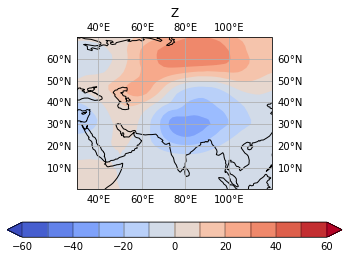

In [34]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som1_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

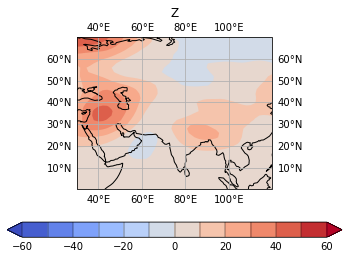

In [35]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som2_cube, cmap='coolwarm',extend='both',levels=levels)
#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

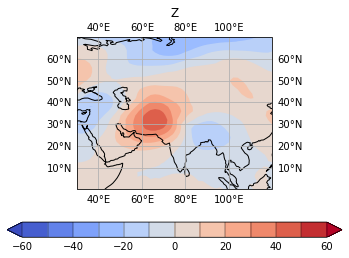

In [36]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som3_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

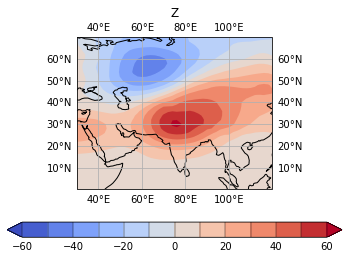

In [37]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som4_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()